In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df=pd.read_csv('email.csv')


In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5573, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

,0
Category,0
Message,0


In [ ]:
df.duplicated().sum()

415

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df= df[df['Category'].isin(['ham', 'spam'])]

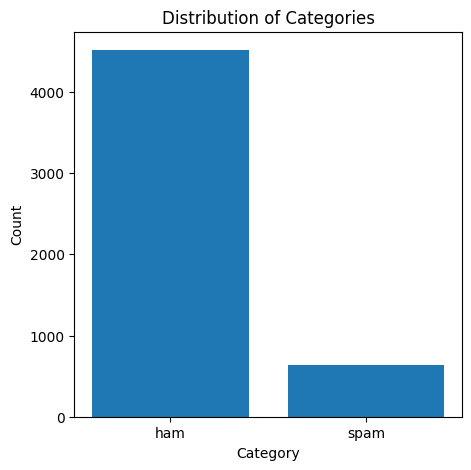

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(df['Category'].value_counts().index, df['Category'].value_counts().values) # Use plt.bar for bar plots from a DataFrame
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})


In [ ]:
x = df['Message']
y = df['Category']

In [ ]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)


In [ ]:
X_cleaned =x.apply(preprocess_text)


In [ ]:
vectorizer = TfidfVectorizer()
X_cleaned = vectorizer.fit_transform(X_cleaned)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)


In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_cleaned = accuracy_score(y_test, y_pred)
report_cleaned = classification_report(y_test, y_pred, target_names=['ham', 'spam'])


In [ ]:
accuracy_cleaned

0.9660852713178295

In [ ]:
report_cleaned

'              precision    recall  f1-score   support\n\n         ham       0.96      1.00      0.98       896\n        spam       1.00      0.74      0.85       136\n\n    accuracy                           0.97      1032\n   macro avg       0.98      0.87      0.92      1032\nweighted avg       0.97      0.97      0.96      1032\n'

In [33]:
spam_words = ' '.join(df[df['Category'] == 1]['Message'].apply(preprocess_text))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

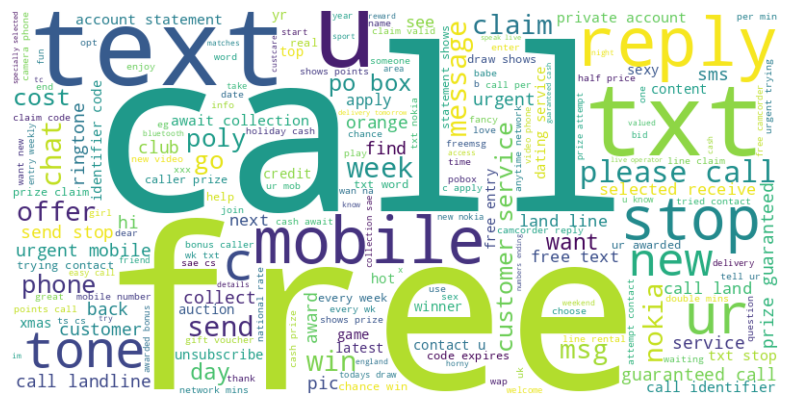

In [34]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

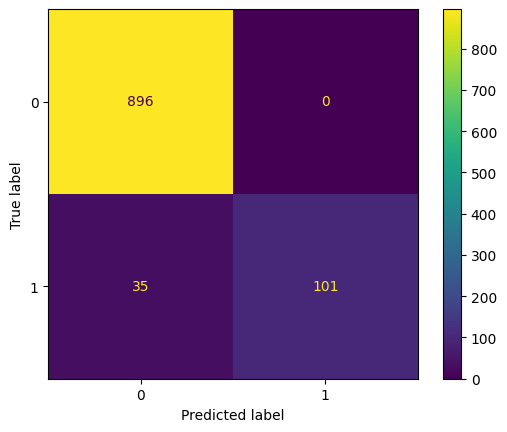

In [35]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
